# TimeSeries Predection for CPU usage

## Upload data to IBM Watson
## Get a streaming file object

## Dataset: This dataset contains data from Unix host for CPU consumption.
### Task is to analyze the dataset for CPU usage (column is entc, Entitled CPU Usage)
### The readings contains CPU data for 30sec interval for one day
### Create a Model
### Test the Model

## Get fileobject from IBM Watson datastore

In [1]:
# The code was removed by Watson Studio for sharing.

### Get Data from the fileobject

In [2]:
## String
def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    #print(text)
    return text

text = load_string(streaming_body_3)

In [3]:
#print(type(text))
df = pd.DataFrame()
for line in text.decode("utf-8").split('\n'):  ##The lines have 'b' at the beggining stating it is encoded to bytes, change to string
    fields = line.rstrip().split(",")  ## remove trailing '\r' at end of line
    tmp = [fields[0],fields[1],fields[2],fields[3],fields[4],fields[5],fields[6],fields[7],fields[8],fields[9],fields[10],fields[11],fields[12]]
    row = pd.Series(tmp)
    df = df.append([row], ignore_index=True)
    #print(line)

IndexError: list index out of range

### the output contains a timestamp and 13 columns

In [5]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1547874030,2.6,1.4,0.0,95.9,0.02,8.3,1.3,43.86,347,0,101,0.73
1,1547874060,2.6,1.7,0.0,95.7,0.02,8.7,1.2,47.08,348,0,101,0.73
2,1547874090,49.2,13.0,0.0,37.8,0.40,160.0,5.7,47.77,455,9,101,0.77


In [6]:
## Provide column headings
column_names = ['timestamp','user','sys','wait','idle','physc','entc','lbusy','app','vcsw','phint','nsp','utcyc']
df.columns = column_names
df.head()

,timestamp,user,sys,wait,idle,physc,entc,lbusy,app,vcsw,phint,nsp,utcyc
0,1547874030,2.6,1.4,0.0,95.9,0.02,8.3,1.3,43.86,347,0,101,0.73
1,1547874060,2.6,1.7,0.0,95.7,0.02,8.7,1.2,47.08,348,0,101,0.73
2,1547874090,49.2,13.0,0.0,37.8,0.40,160.0,5.7,47.77,455,9,101,0.77
3,1547874120,2.7,1.9,0.0,95.3,0.02,9.3,1.4,49.00,380,0,101,0.73
4,1547874150,2.6,1.6,0.0,95.7,0.02,8.7,1.4,48.13,356,0,101,0.73


In [7]:
## Convert timestamp to date format
df['Date'] = pd.to_datetime(df['timestamp'], unit='s')

In [8]:
## Set Date as the index
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

,timestamp,user,sys,wait,idle,physc,entc,lbusy,app,vcsw,phint,nsp,utcyc
Date,,,,,,,,,,,,,
2019-01-19 05:00:30,1547874030,2.6,1.4,0.0,95.9,0.02,8.3,1.3,43.86,347,0,101,0.73
2019-01-19 05:01:00,1547874060,2.6,1.7,0.0,95.7,0.02,8.7,1.2,47.08,348,0,101,0.73
2019-01-19 05:01:30,1547874090,49.2,13.0,0.0,37.8,0.40,160.0,5.7,47.77,455,9,101,0.77
2019-01-19 05:02:00,1547874120,2.7,1.9,0.0,95.3,0.02,9.3,1.4,49.00,380,0,101,0.73
2019-01-19 05:02:30,1547874150,2.6,1.6,0.0,95.7,0.02,8.7,1.4,48.13,356,0,101,0.73


In [10]:
## Sort using Date column
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

In [11]:
df_idx.head()

,app,entc,idle,lbusy,nsp,phint,physc,sys,timestamp,user,utcyc,vcsw,wait
Date,,,,,,,,,,,,,
2019-01-20 05:02:00,49.18,151.7,37.9,5.6,101,8,0.38,12.7,1547960520,49.3,0.77,442,0.0
2019-01-20 05:01:30,49.05,14.2,92.3,1.6,101,1,0.04,2.4,1547960490,5.3,0.75,377,0.0
2019-01-20 05:01:00,49.34,8.5,95.8,1.4,101,0,0.02,1.5,1547960460,2.6,0.73,368,0.0
2019-01-20 05:00:30,45.04,8.8,95.6,1.3,101,0,0.02,1.7,1547960430,2.7,0.74,353,0.0
2019-01-20 05:00:00,47.88,8.0,96.1,1.3,101,0,0.02,1.4,1547960400,2.5,0.73,339,0.0


### Import appropriate libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### We are interested only in one column - ENTC (which shows the Physical CPU usage)

In [12]:
data = df_idx[['entc']]

In [13]:
data.head()

,entc
Date,
2019-01-20 05:02:00,151.7
2019-01-20 05:01:30,14.2
2019-01-20 05:01:00,8.5
2019-01-20 05:00:30,8.8
2019-01-20 05:00:00,8.0


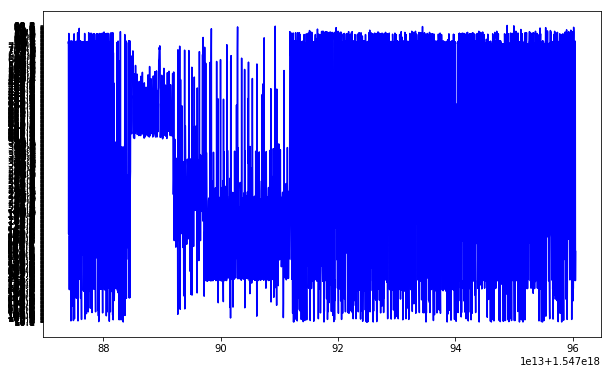

In [16]:
## Lets plot and see how it looks
plt.figure(figsize=(10,6))  
plt.plot(data, color='blue', label='Actual entc')  
plt.show()  

### We will split the data to Training and Test set.
### Lets pick a date to split the data. (approx 20% Test and 80% Train)

In [17]:
split_date = pd.Timestamp('2019-01-19 21:40:30')
print(split_date)
print(type(split_date))

2019-01-19 21:40:30
<class 'pandas._libs.tslib.Timestamp'>


In [18]:
## Get training dataset
train = data.loc[split_date:]
train.shape

(2001, 1)

In [19]:
## Get test dataset
test = data.loc[:split_date]
test.shape

(884, 1)

In [20]:
train.head()

,entc
Date,
2019-01-19 21:40:30,8.8
2019-01-19 21:40:00,9.1
2019-01-19 21:39:30,19.5
2019-01-19 21:39:00,17.5
2019-01-19 21:38:30,8.7


In [21]:
test.head()

,entc
Date,
2019-01-20 05:02:00,151.7
2019-01-20 05:01:30,14.2
2019-01-20 05:01:00,8.5
2019-01-20 05:00:30,8.8
2019-01-20 05:00:00,8.0


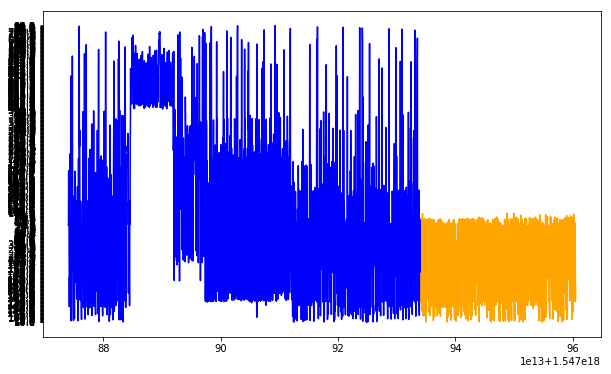

In [22]:
## Lets do a quick plot to see how this looks
plt.figure(figsize=(10,6))
plt.plot(test, color='orange', label='Test data')  
plt.plot(train, color='blue', label='Train data')  
plt.show()  

### Normalize the data
### Using MinMaxScaler

In [23]:
### Normalize Train and Test datasets
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [24]:
## Convert the dataset to pandas DataFrame
train_sc_df = pd.DataFrame(train_sc, columns=['entc'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['entc'], index=test.index)

In [25]:
train_sc_df.head()
train_sc_df.shape

(2001, 1)

#### In order to Predict the next series of values, need to shift dataset with additional columns data
#### Here we just shift by one step

In [26]:
for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['entc'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['entc'].shift(s)

In [30]:
train_sc_df.head()

,entc,X_1
Date,,
2019-01-19 21:40:30,0.001465,NaN
2019-01-19 21:40:00,0.001865,0.001465
2019-01-19 21:39:30,0.015717,0.001865
2019-01-19 21:39:00,0.013053,0.015717
2019-01-19 21:38:30,0.001332,0.013053


In [31]:
test_sc_df.head()

,entc,X_1
Date,,
2019-01-20 05:02:00,0.191795,NaN
2019-01-20 05:01:30,0.008657,0.191795
2019-01-20 05:01:00,0.001066,0.008657
2019-01-20 05:00:30,0.001465,0.001066
2019-01-20 05:00:00,0.000400,0.001465


#### Cleanup the dataset by removing NaN values
#### Drop the predictor column (which is entc) from training set
#### Drop the new column (X_1) from test set

In [42]:
X_train = train_sc_df.dropna().drop('entc', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)
X_test = test_sc_df.dropna().drop('entc', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

In [37]:
X_train.head()

,X_1
Date,
2019-01-19 21:40:00,0.001465
2019-01-19 21:39:30,0.001865
2019-01-19 21:39:00,0.015717
2019-01-19 21:38:30,0.013053
2019-01-19 21:38:00,0.001332


In [43]:
X_test.head()

,X_1
Date,
2019-01-20 05:01:30,0.191795
2019-01-20 05:01:00,0.008657
2019-01-20 05:00:30,0.001066
2019-01-20 05:00:00,0.001465
2019-01-20 04:59:30,0.000400


In [44]:
y_train.head()

,entc
Date,
2019-01-19 21:40:00,0.001865
2019-01-19 21:39:30,0.015717
2019-01-19 21:39:00,0.013053
2019-01-19 21:38:30,0.001332
2019-01-19 21:38:00,0.004662


In [45]:
## Convert the Training dataset into Numpy Arrays
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

## Convert the test dataset into Numpy Arrays
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [46]:
X_train.shape

(2000, 1)

In [47]:
X_test.shape

(883, 1)

In [48]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (2000 x 1)
Test size: (883 x 1)


### Define the Model and Compile

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [50]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [51]:
## Now fit the model for training set
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
2000/2000 [==============================] - 0s 72us/step - loss: 0.0193
Epoch 2/20
2000/2000 [==============================] - 0s 24us/step - loss: 0.0080
Epoch 3/20
2000/2000 [==============================] - 0s 20us/step - loss: 0.0074
Epoch 4/20
2000/2000 [==============================] - 0s 32us/step - loss: 0.0071
Epoch 5/20
2000/2000 [==============================] - 0s 20us/step - loss: 0.0068
Epoch 6/20
2000/2000 [==============================] - 0s 33us/step - loss: 0.0065
Epoch 7/20
2000/2000 [==============================] - 0s 20us/step - loss: 0.0063
Epoch 8/20
2000/2000 [==============================] - 0s 35us/step - loss: 0.0061
Epoch 9/20
2000/2000 [==============================] - 0s 33us/step - loss: 0.0061
Epoch 10/20
2000/2000 [==============================] - 0s 21us/step - loss: 0.0060
Epoch 11/20
2000/2000 [==============================] - 0s 35us/step - loss: 0.0059
Epoch 12/20
2000/2000 [==============================] - 0s 20us/step - lo

In [52]:
## Predict values for entc on the test dataset
y_pred = model.predict(X_test)

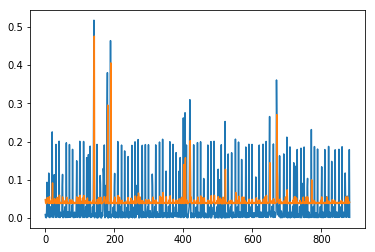

In [53]:
## Plot the actual values and predicted values
plt.plot(y_test)
plt.plot(y_pred)

### (Optional) Convert the dataset to Normal set (inverse transform)
### Then plot the dataset with time 
### Plot for both Training and Prediction data (ENTC)

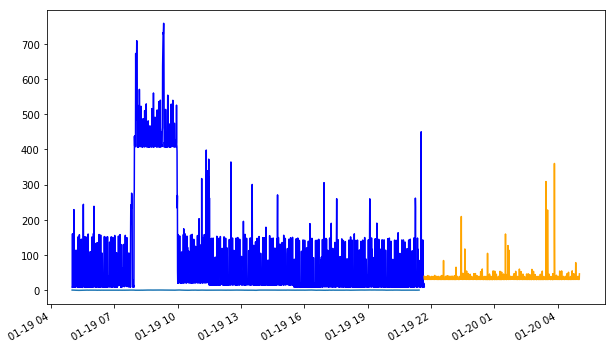

In [126]:
plt.figure(figsize=(10,6))

plt.plot(train_cs_df, color='blue', label='Training data')  
plt.plot(test_cs_df, color='orange', label='Prediction data') 
sr = pd.Series(np.random.randn(len(train_dates)), index=dates)
sr.rolling(30).mean().plot()

plt.show()